# Engagement Score Prediction



Step1: importing required libraries to make predictions

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Step2: to import the data sets using pandas

In [186]:
train = pd.read_csv("C:/Users/Admin/Downloads/train_0OECtn8.csv")
test = pd.read_csv("C:/Users/Admin/Downloads/test_1zqHu22.csv")

In [120]:
# to check dimensions of the data set
train.shape, test.shape

((89197, 10), (11121, 9))

a.In the above training data set 10 varaibles and 89197 records are available, last column engagement score is the output variable.
b.In the test dataset 9 variables are available and out put varaible engagement score is not provided we have to make prediction for the test data

In [122]:
# to see the training data set  
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [124]:
# to see the training data set  
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [125]:
train.dtypes

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

In [ ]:
in the train data set only gender and profession varaibles are categorical and remain are in continous data type

In [126]:
test.dtypes

row_id          int64
user_id         int64
category_id     int64
video_id        int64
age             int64
gender         object
profession     object
followers       int64
views           int64
dtype: object

in the test dataset also only gender and profession varaibles are categorical and remain are in continous data type

# data processing

Step3: checking the variables in the training dataset for null values

In [20]:
train.isnull().sum()/train.shape[0] *100

row_id              0.0
user_id             0.0
category_id         0.0
video_id            0.0
age                 0.0
gender              0.0
profession          0.0
followers           0.0
views               0.0
engagement_score    0.0
dtype: float64

In the above results training data set has no missing values or na values, then no need to imputing operations

Checking missing values in the test data set

In [21]:
test.isnull().sum()/test.shape[0] *100

row_id         0.0
user_id        0.0
category_id    0.0
video_id       0.0
age            0.0
gender         0.0
profession     0.0
followers      0.0
views          0.0
dtype: float64

In the test data set also , missing 

In [25]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 2
Numerical Features in Train Set: 8


In [26]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 2
Numerical Features in Test Set: 7


In [29]:
train.columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views', 'engagement_score'],
      dtype='object')

In [43]:
train.info

<bound method DataFrame.info of        row_id  user_id  category_id  video_id  age  gender  \
0           1    19990           37       128   24    Male   
1           2     5304           32       132   14  Female   
2           3     1840           12        24   19    Male   
3           4    12597           23       112   19    Male   
4           5    13626           23       112   27    Male   
...       ...      ...          ...       ...  ...     ...   
89192   89193    23996           15        32   25    Male   
89193   89194    20466           20        47   31    Male   
89194   89195    13655           16        97   25    Male   
89195   89196    24840            9        18   35    Male   
89196   89197    27183           25       150   13    Male   

                 profession  followers  views  engagement_score  
0                   Student        180   1000              4.33  
1                   Student        330    714              1.79  
2                   Stude

# to see the how many unique values in the variables and also we can identify there is any chance to categories and identify labels

In [128]:
for col in train.columns:
    print(col, ':', len(train[col].unique()), 'labels')

row_id : 89197 labels
user_id : 27734 labels
category_id : 47 labels
video_id : 175 labels
age : 58 labels
gender : 2 labels
profession : 3 labels
followers : 17 labels
views : 43 labels
engagement_score : 229 labels


In the above results row _id has 89197 unique values is there, 27734 users are registered, 47 category of videos, and 175 different video_id's are uploaded. 
age is integer variable
gender has two categories
profession has 3 categories
followers, views and engagement score are continous type

In [131]:
for col in test.columns:
    print(col, ':', len(test[col].unique()), 'labels')

row_id : 11121 labels
user_id : 10384 labels
category_id : 23 labels
video_id : 128 labels
age : 53 labels
gender : 2 labels
profession : 3 labels
followers : 15 labels
views : 21 labels


Here is showing distinct values in the video_id and category_id variables are very less when compared with train dataset. to make one hot encoding for the category_id and vidoe_id is not appropriate why becaues of in the train and test data sets those varaibles unique values are vary to create dummy variables in the train data set we can make 46 and 174 varaibles for category_id and video_id variables with respect one hot encooding but in in the test data set we can make only 22 aND 127 DUMMY variables, when we are making predictions both datasets of predictor variables seze must be equal.
And also row_ID, user_id, category_id, and video_id varaibles are identifier variables, to use in the predictor variables in this situation not appropriate.

# to check value counts like tabulation of the variables

In [129]:
train["category_id"].value_counts()

5     8104
8     6313
25    4880
19    4679
21    4043
12    3889
11    3766
4     3678
34    3297
16    3264
13    2777
32    2712
23    2671
18    2241
42    2178
15    2164
9     1886
7     1885
31    1855
3     1845
1     1810
6     1399
39    1339
28    1309
10    1217
17    1208
26    1156
27    1103
36    1025
43    1019
35     986
37     962
29     916
20     702
30     548
41     545
14     536
38     534
24     524
33     517
40     458
22     366
46     236
45     227
44     214
2      167
47      47
Name: category_id, dtype: int64

In category_id variable, category 5 has the highest count 8104, and least is category 47. 17 categories are showing count less than 1000, in that only five categories are less than 500.

In [130]:
train["video_id"].value_counts()

112    1337
53     1334
1      1282
65     1103
42     1077
       ... 
165      78
170      78
174      70
166      66
175      47
Name: video_id, Length: 175, dtype: int64

in the video_id variable there are 175 disticts values existed, 

In [39]:
print(train["gender"].value_counts())

Male      52397
Female    36800
Name: gender, dtype: int64


In the gender variable there are two categories males and females

In [42]:
train.category_id.value_counts().sort_values(ascending=False).head(30)

5     8104
8     6313
25    4880
19    4679
21    4043
12    3889
11    3766
4     3678
34    3297
16    3264
13    2777
32    2712
23    2671
18    2241
42    2178
15    2164
9     1886
7     1885
31    1855
3     1845
1     1810
6     1399
39    1339
28    1309
10    1217
17    1208
26    1156
27    1103
36    1025
43    1019
Name: category_id, dtype: int64

In [44]:
print(train["profession"].value_counts())

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64


In the profession varaible three categories existed namely, student, other and Working Professional

# Exploaratory data analysis

In [135]:
train.corr()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
row_id,1.000000,-0.006953,0.002833,0.000891,-0.005199,-0.001374,-0.001815,-0.003368
user_id,-0.006953,1.000000,0.002139,0.005232,-0.000036,-0.002026,-0.001843,-0.002900
category_id,0.002833,0.002139,1.000000,0.556550,-0.003152,0.056432,0.079321,-0.094288
video_id,0.000891,0.005232,0.556550,1.000000,-0.005615,0.098778,-0.029448,-0.030552
age,-0.005199,-0.000036,-0.003152,-0.005615,1.000000,0.004623,0.011042,-0.232626
followers,-0.001374,-0.002026,0.056432,0.098778,0.004623,1.000000,0.360808,0.000855
views,-0.001815,-0.001843,0.079321,-0.029448,0.011042,0.360808,1.000000,-0.084679
engagement_score,-0.003368,-0.002900,-0.094288,-0.030552,-0.232626,0.000855,-0.084679,1.000000


<AxesSubplot:xlabel='category_id', ylabel='count'>

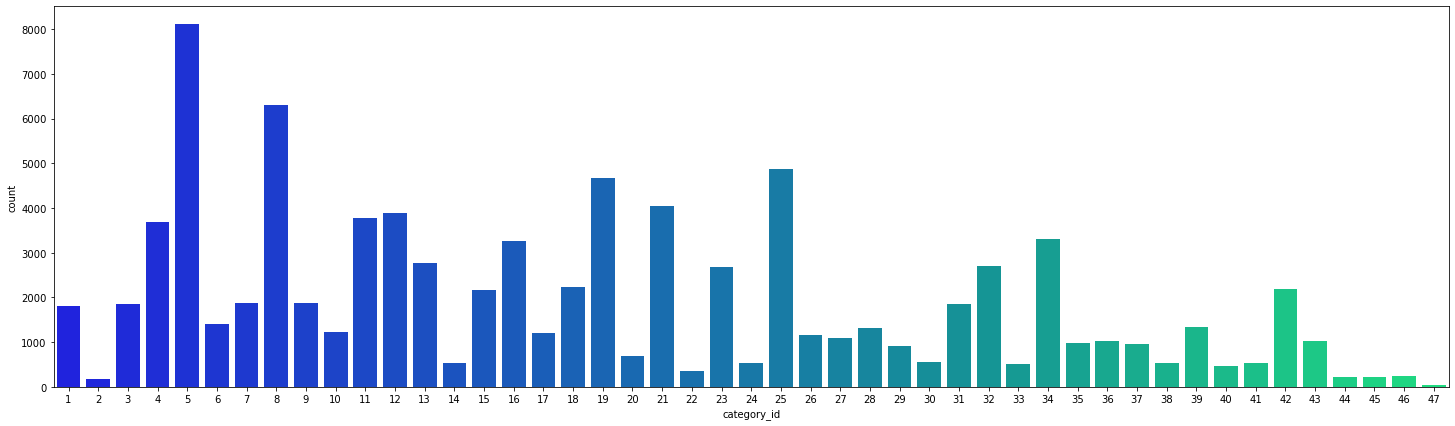

In [147]:
plt.figure(figsize=(25,7))
sns.countplot('category_id',data=train,palette='winter')

#category 5 and 7 are type vidoes are uploading frequently high
#category 20 onwards frequency is low

<AxesSubplot:xlabel='gender', ylabel='count'>

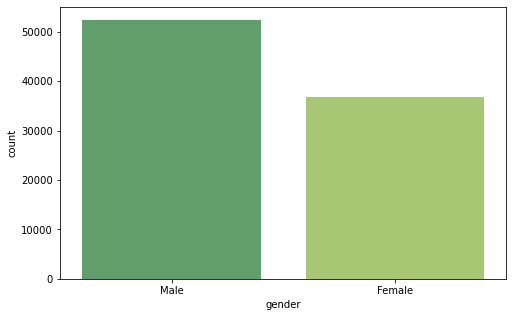

In [145]:
plt.figure(figsize=(8,5))
sns.countplot('gender',data=train,palette='summer')

males are participating more

<AxesSubplot:xlabel='profession', ylabel='count'>

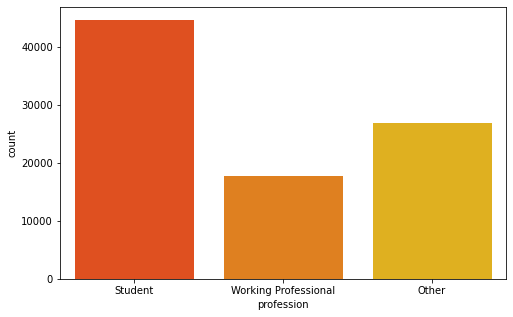

In [144]:
plt.figure(figsize=(8,5))
sns.countplot('profession',data=train,palette='autumn')

students are participating more

<AxesSubplot:xlabel='engagement_score', ylabel='profession'>

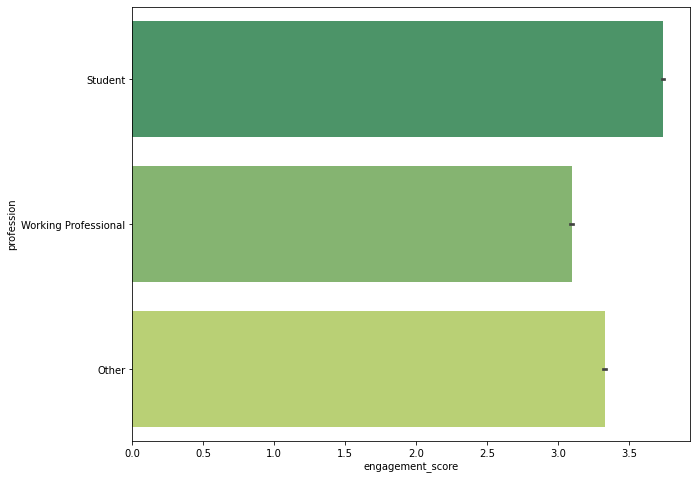

In [151]:
plt.figure(figsize=(10,8))
sns.barplot(y='profession',x='engagement_score',data=train,palette='summer')

students have more engagement score

<AxesSubplot:xlabel='age'>

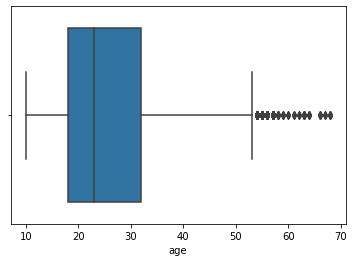

In [133]:
sns.boxplot(train.age)

median age is less than 23, minimum age is 10, 17 is the first quartile and 33 is the third quartile

# encoding

In [192]:
dummy =pd.get_dummies(train.profession, drop_first=True)
dummy2 =pd.get_dummies(train.gender, drop_first=True)
dummy3=pd.get_dummies(train.category_id, drop_first=True)
dummy4=pd.get_dummies(train.video_id, drop_first=True)

we are encoding profession, category_id, gender and video_id but here data was givened provided by splitting now to encoding variables make more difficult. Now we are encoding only profession and gender variables

# we are binding the variables using concating command

In [193]:
train_merged=pd.concat([train, dummy, dummy2], axis= 'columns')

creating dummy variables for test data

In [158]:
validate=test
vdummy =pd.get_dummies(test.profession, drop_first=True)
vdummy2 =pd.get_dummies(test.gender, drop_first=True)
vdummy3=pd.get_dummies(test.category_id, drop_first=True)
vdummy4=pd.get_dummies(test.video_id, drop_first=True)

In [169]:
v_merged=pd.concat([test,vdummy, vdummy2], axis= 'columns')

to dimenstions of the both test and train data sets

In [194]:
train_final= train_merged.drop(['row_id', 'user_id', 'category_id', 'video_id', 'gender', 'profession'], axis='columns')

In [190]:
train_final.shape

(89197, 7)

In [170]:
v_final= v_merged.drop(['row_id', 'user_id', 'category_id', 'video_id', 'gender', 'profession'], axis='columns')

In [171]:
v_final.shape

(11121, 6)

# making training data to model fitting

In [195]:
x= train_final.drop('engagement_score', axis='columns')
y= train_final.engagement_score

In [196]:
x.isnull().sum()/test.shape[0] *100

age                     0.0
followers               0.0
views                   0.0
Student                 0.0
Working Professional    0.0
Male                    0.0
dtype: float64

In [202]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [204]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

rmse_list = []
r_square =[]

In [205]:
for name in algos:
    model = name
    model.fit(x,y)
    y_pred = model.predict(x)
    MSE= metrics.mean_squared_error(y,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
    r2=r2_score(y,y_pred)
    r_square.append(r2)

In [206]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list, 'R_Square': r_square})

In [207]:
evaluation

,Model,RMSE,R_Square
0,Linear Regression,0.740614,0.264359
1,Ridge Regression,0.740614,0.264359
2,Lasso Regression,0.844085,0.044448
3,K Neighbors Regressor,0.713077,0.318045
4,Decision Tree Regressor,0.656157,0.422572


when coming to the evaluation RMSE is very low for Decision tree and r_square value also very high for the decision tree

# Decision tree

In [214]:
#Import the regression tree model
from sklearn.tree import DecisionTreeRegressor

#Parametrize the model
#We will use the mean squered error == varince as spliting criteria and set the minimum number
#of instances per leaf = 5
regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=5) 


#Fit the model
regression_model.fit(x,y)

predicted = regression_model.predict(x)

#Compute and plot the RMSE

RMSE = np.sqrt(np.sum(((y-predicted)**2)/len(y)))
RMSE

0.6655459160550754

In [216]:
#Predict unseen query instances
predicted1 = regression_model.predict(vfinal)

In [238]:
submission_DT = pd.read_csv('C:/Users/Admin/Downloads/sample_submission_JPlpRcN.csv')
submission_DT['engagement_score']= predicted1.round(2)

In [237]:
submission.head()

,row_id,engagement_score
0,89198,4.11
1,89199,3.74
2,89200,3.02
3,89201,3.90
4,89202,1.73


In [235]:
submission.to_csv(r'C:\Users\Admin\Downloads\submission.csv')